In [71]:
import glob
import xml.etree.ElementTree as ET
import random

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import seaborn as sns
import pandas as pd

## Sample Image with Annotation

In [16]:
data_path = glob.glob("openlogo/JPEGImages/*.jpg")

In [19]:
sample_image = random.choices(data_path, k=6)
sample_annotations = [p.replace("JPEGImages", "Annotations").replace("jpg", "xml") for p in sample_image]

In [137]:
sample_image

['openlogo/JPEGImages/logos32plus_002035.jpg',
 'openlogo/JPEGImages/levis19.jpg',
 'openlogo/JPEGImages/porsche27.jpg',
 'openlogo/JPEGImages/logos32plus_001146.jpg',
 'openlogo/JPEGImages/logos32plus_005756.jpg',
 'openlogo/JPEGImages/amazon25.jpg']

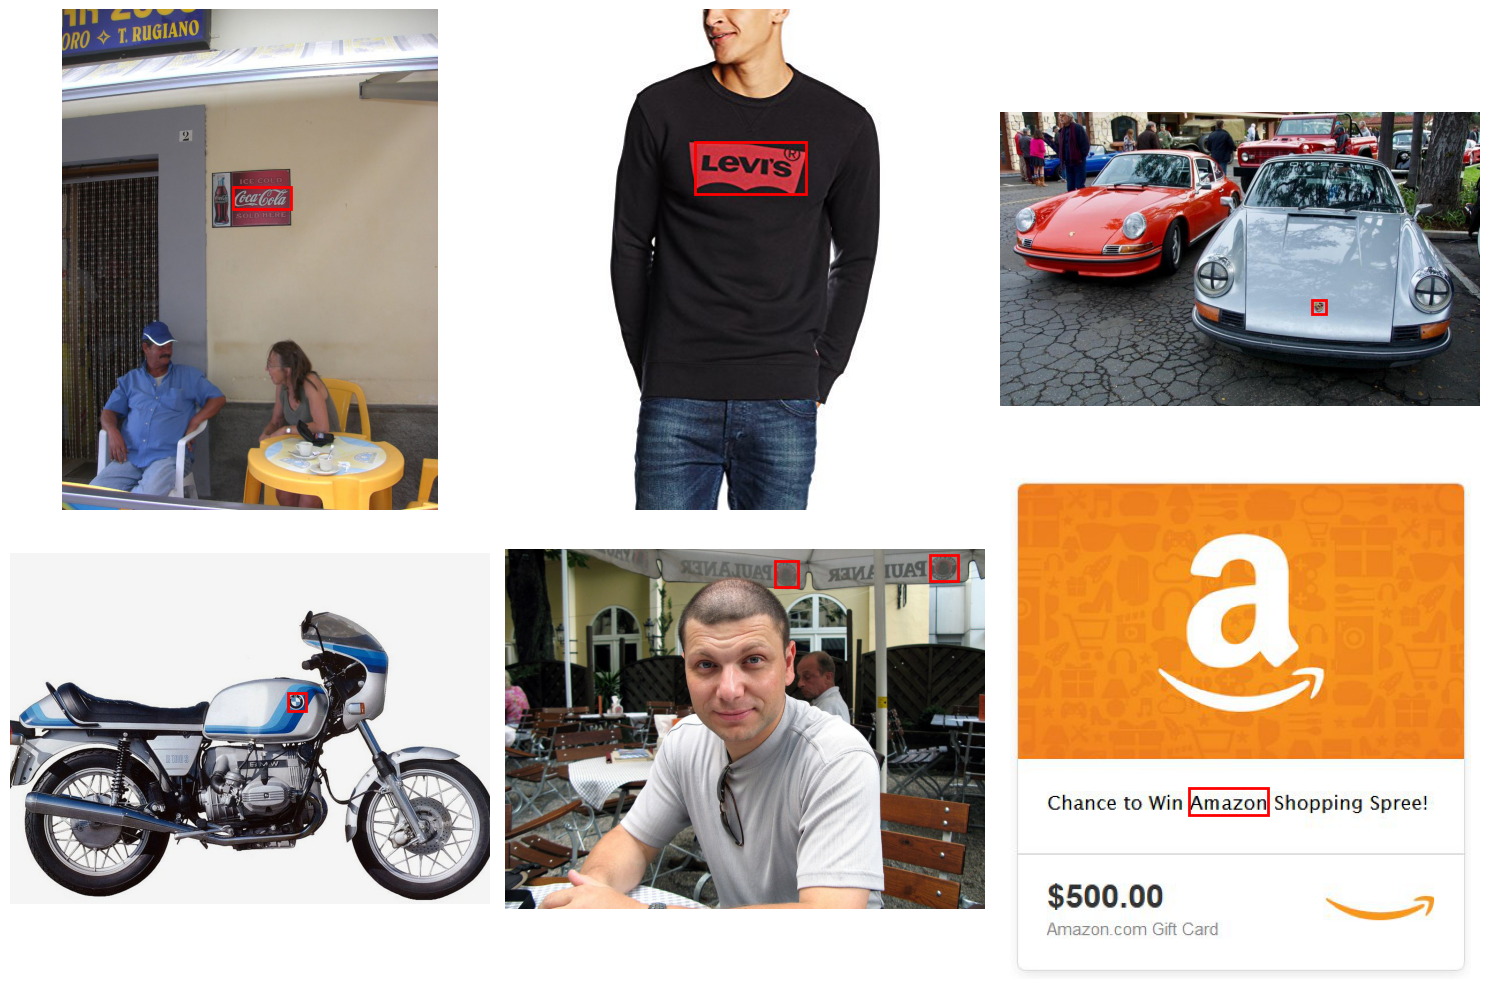

In [72]:
def parse_annotation_bbox(annotation_file):
    tree = ET.parse(annotation_file)
    root = tree.getroot()
    
    bounding_boxes = []
    for obj in root.findall("object"):
        bndbox = obj.find("bndbox")
        x = int(bndbox.find("xmin").text)
        y = int(bndbox.find("ymin").text)
        w = int(bndbox.find("xmax").text) - x
        h = int(bndbox.find("ymax").text) - y
        bounding_boxes.append((x, y, w, h))
    return bounding_boxes

    return bounding_boxes

# Display images with annotations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (si, sa) in enumerate(zip(sample_image, sample_annotations)):
    img = plt.imread(si)
    axes[i].imshow(img)
    axes[i].axis('off')
    
    bboxes = parse_annotation_bbox(sa)
    for bbox in bboxes:
        x, y, w, h = bbox
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        axes[i].add_patch(rect)

plt.tight_layout()

## Image & Logo Size Distribution

In [88]:
def parse_annotation_size(annotation_file):
    tree = ET.parse(annotation_file)
    root = tree.getroot()

    size = {}
    for obj in root.findall("object"):
        bndbox = obj.find("bndbox")
        w = int(bndbox.find("xmax").text) - int(bndbox.find("xmin").text)
        h = int(bndbox.find("ymax").text) - int(bndbox.find("ymin").text)
                          
        size["Logo Width"] = w
        size["Logo Height"] = h
                          
    for sz in root.findall("size"):
        w = int(sz.find("width").text)
        h = int(sz.find("height").text)
        
        size["Image Width"] = w
        size["Image Height"] = h

    return size

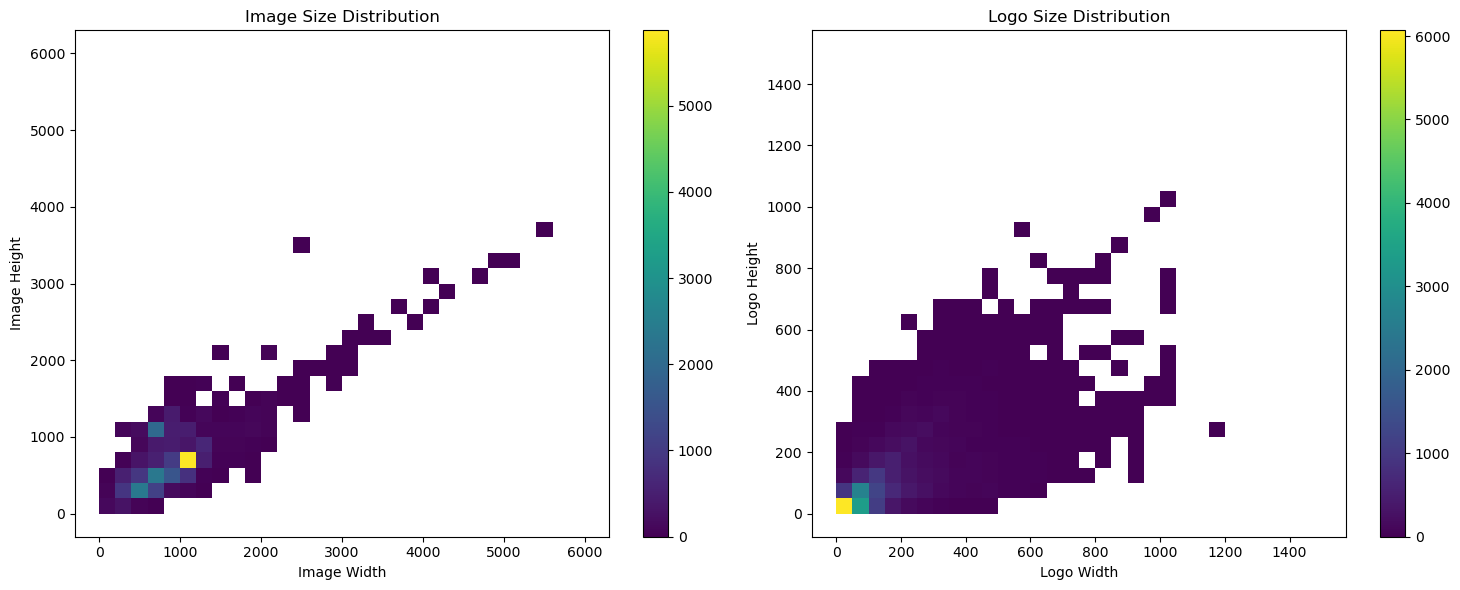

In [116]:
data = []
for sa in glob.glob("openlogo/Annotations/*.xml"):
    data.append(parse_annotation_size(sa))

df = pd.DataFrame(data)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=df, x="Image Width", y="Image Height", ax=axes[0], bins=30, cbar=True, cmap="viridis", pthresh=0.01, binrange=(0, 6000))
axes[0].set_title("Image Size Distribution")
sns.histplot(data=df, x="Logo Width", y="Logo Height", ax=axes[1], bins=30, cbar=True, cmap="viridis", pthresh=0.01, binrange=(0, 1500))
axes[1].set_title("Logo Size Distribution")

plt.tight_layout()

## Logo Class Distribution

Text(0.5, 1.0, 'Logo Frequency Distribution')

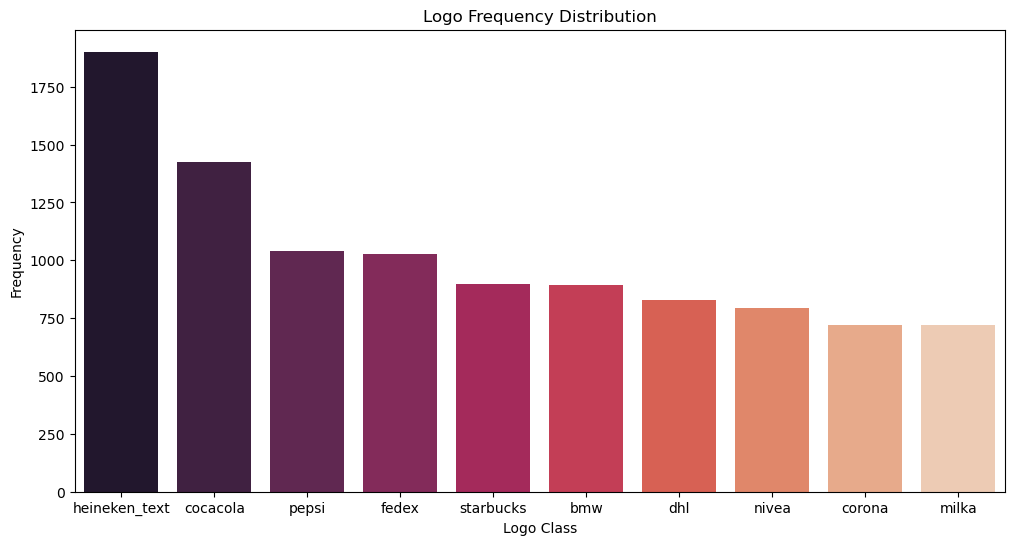

In [135]:
from collections import Counter

def parse_annotation_class(annotation_file):
    tree = ET.parse(annotation_file)
    root = tree.getroot()

    logo_classes = []
    for obj in root.findall("object"):
        logo_class = obj.find("name").text
        logo_classes.append(logo_class)
    return logo_classes

logo_counter = Counter()
for sa in glob.glob("openlogo/Annotations/*.xml"):
    logo_classes = parse_annotation_class(sa)
    logo_counter.update(logo_classes)
    
logo_counter = logo_counter.most_common(10)
logo_df = pd.DataFrame(logo_counter, columns=["Logo Class", "Frequency"])

plt.figure(figsize=(12, 6))
fig = sns.barplot(data=logo_df, x="Logo Class", y="Frequency", palette="rocket")
plt.xlabel("Logo Class")
plt.ylabel("Frequency")
plt.title("Logo Frequency Distribution")

## Interesting Data

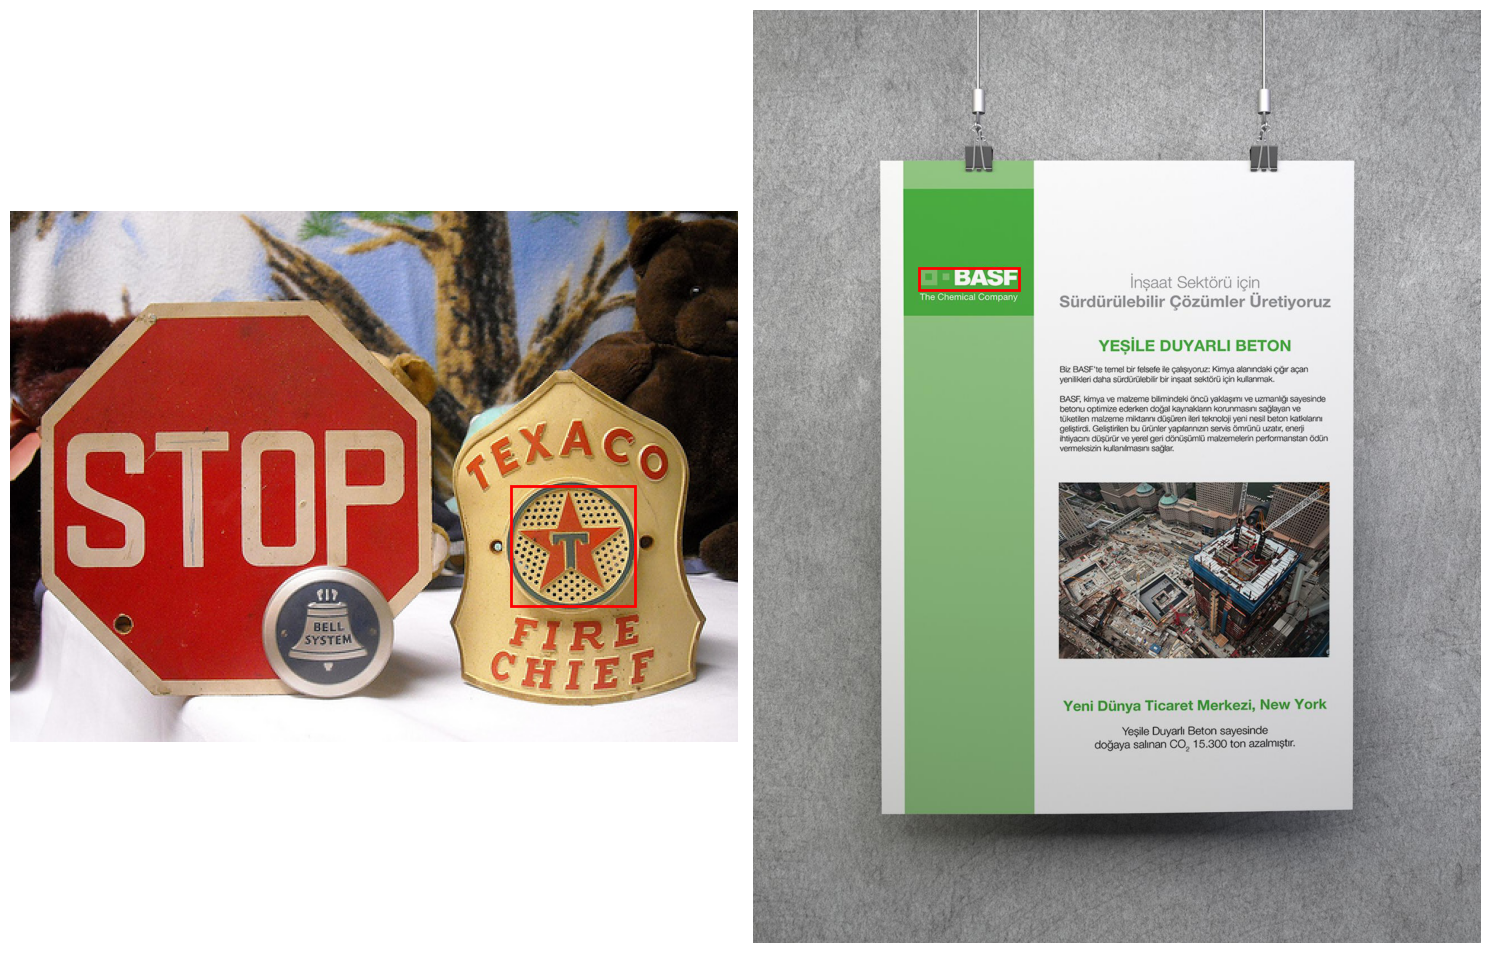

In [150]:
interesting_image = [
    "openlogo/JPEGImages/3496426077.jpg", 
    "openlogo/JPEGImages/BASFimg000071.jpg"
]
interesting_annotations = [p.replace("JPEGImages", "Annotations").replace("jpg", "xml") for p in interesting_image]

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes = axes.ravel()

for i, (si, sa) in enumerate(zip(interesting_image, interesting_annotations)):
    img = plt.imread(si)
    axes[i].imshow(img)
    axes[i].axis('off')
    
    bboxes = parse_annotation_bbox(sa)
    for bbox in bboxes:
        x, y, w, h = bbox
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        axes[i].add_patch(rect)
plt.tight_layout()

## 